In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy_nn as nn

In [164]:
dataset = sns.load_dataset("iris")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [165]:
train_data, val_data, test_data = np.split(dataset.sample(frac=1, random_state=42), [int(.6 * len(dataset)), int(.8 * len(dataset))])
print(f'Training set size: {len(train_data)}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

Training set size: 90
Validation set size: 30
Test set size: 30


In [166]:
TARGET_NAME = "species"
NUM_VARIABLES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [167]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [168]:
val_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
120,6.9,3.2,5.7,2.3,virginica
83,6.0,2.7,5.1,1.6,versicolor
134,6.1,2.6,5.6,1.4,virginica
135,7.7,3.0,6.1,2.3,virginica


In [169]:
test_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,versicolor
41,4.5,2.3,1.3,0.3,setosa
58,6.6,2.9,4.6,1.3,versicolor
90,5.5,2.6,4.4,1.2,versicolor
48,5.3,3.7,1.5,0.2,setosa


In [170]:
target_classes_train = np.sort(train_data[TARGET_NAME].unique())
target_classes_val = np.sort(val_data[TARGET_NAME].unique())
target_classes_test = np.sort(test_data[TARGET_NAME].unique())
target_classes_train

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [171]:
target_classes_val

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [172]:
target_classes_test

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [173]:
train_data[TARGET_NAME] = train_data[TARGET_NAME].replace(target_classes_train, np.arange(target_classes_train.size))
val_data[TARGET_NAME] = val_data[TARGET_NAME].replace(target_classes_val, np.arange(target_classes_val.size))
test_data[TARGET_NAME] = test_data[TARGET_NAME].replace(target_classes_test, np.arange(target_classes_test.size))
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [174]:
train_ds = nn.data.Dataset(train_data, TARGET_NAME, [], NUM_VARIABLES)
val_ds = nn.data.Dataset(val_data, TARGET_NAME, [], NUM_VARIABLES)
test_ds = nn.data.Dataset(test_data, TARGET_NAME, [], NUM_VARIABLES)

In [175]:
model = nn.models.Sequential([
    nn.layers.core.Input((1, train_ds.num_of_features())),
    nn.layers.core.Dense(30, activation='relu'),
    nn.layers.core.Dense(3, activation='softmax')
])

In [176]:
model.compile(optimizer=nn.optimizers.Adam(lr=0.001),
              loss=nn.losses.CategoricalCrossEntropy(),
              metrics=['accuracy', 'val_accuracy'])

In [177]:
train_ds.batch(16)
val_ds.batch(16)

In [178]:
history = model.fit(train_data=train_ds, validation_data=val_ds, epochs=100)

Epoch 1/100:
0.015s - accuracy: 0.283 - val_accuracy: 0.500 - loss: 1.101 - val_loss: 1.063
Epoch 2/100:
0.006s - accuracy: 0.362 - val_accuracy: 0.598 - loss: 1.071 - val_loss: 1.039
Epoch 3/100:
0.003s - accuracy: 0.552 - val_accuracy: 0.647 - loss: 1.046 - val_loss: 1.017
Epoch 4/100:
0.004s - accuracy: 0.665 - val_accuracy: 0.670 - loss: 1.018 - val_loss: 0.992
Epoch 5/100:
0.003s - accuracy: 0.690 - val_accuracy: 0.665 - loss: 0.992 - val_loss: 0.967
Epoch 6/100:
0.004s - accuracy: 0.694 - val_accuracy: 0.696 - loss: 0.972 - val_loss: 0.946
Epoch 7/100:
0.003s - accuracy: 0.698 - val_accuracy: 0.710 - loss: 0.945 - val_loss: 0.917
Epoch 8/100:
0.003s - accuracy: 0.725 - val_accuracy: 0.728 - loss: 0.919 - val_loss: 0.896
Epoch 9/100:
0.006s - accuracy: 0.752 - val_accuracy: 0.732 - loss: 0.889 - val_loss: 0.866
Epoch 10/100:
0.004s - accuracy: 0.775 - val_accuracy: 0.701 - loss: 0.856 - val_loss: 0.842
Epoch 11/100:
0.003s - accuracy: 0.775 - val_accuracy: 0.710 - loss: 0.827 - va

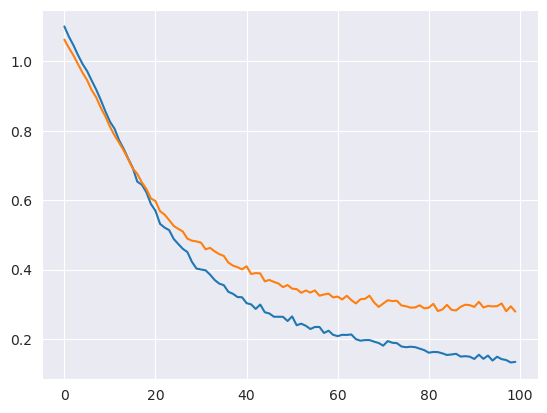

In [179]:
plt.plot(history.epochs, history.history['loss'], history.history["val_loss"])

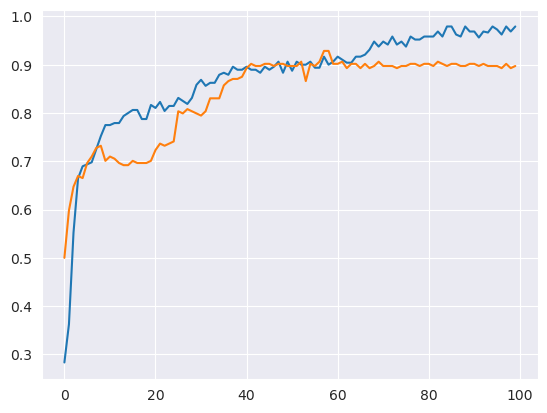

In [180]:
plt.plot(history.epochs, history.history['accuracy'], history.history['val_accuracy'])

In [181]:
y_pred = model.predict(test_ds.dataset.T)
y_true = test_ds.target.T
accuracy = nn.accuracy(y_true, y_pred)

print(f'Test set accuracy: {accuracy:.0%}')

Test set accuracy: 93%
